In [449]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
!pip install graphviz
import graphviz #to visualize decision trees

In [450]:
features_response = df.columns.tolist()

In [451]:
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT', 'graduate school', 'high school', 'none',
                   'others', 'university']

In [452]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [537]:
from sklearn.model_selection import train_test_split
from sklearn import tree
X_train, X_test, y_train, y_test = \
train_test_split(df[features_response[:-1]].values, df['default payment next month'].values,
test_size=0.2, random_state=24)

In [538]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [539]:
dt.fit(X_train, y_train)
!pip install pydotplus
import pydotplus

In [548]:
!pip install graphviz
import graphviz
from graphviz import Digraph
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response[:-1],
                                proportion=True, class_names=['Not defaulted', 'Defaulted'])

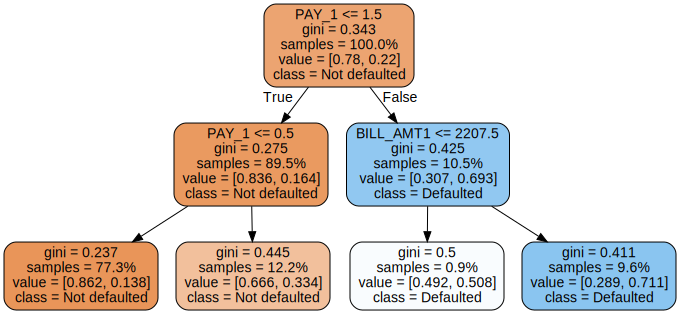

In [549]:
graph = graphviz.Source(dot_data) 
graph

In [458]:
features_response[:-1].index('PAY_1')

4

In [459]:
X_train.shape

(21583, 17)

In [460]:
sum(X_train[:,4] <= 1.5)/X_train.shape[0]

0.8953342908770792

In [461]:
np.mean(y_train)

0.21970995691053144

In [462]:
pm0 = np.linspace(0.01,0.99,99)

In [463]:
pm1 = 1 - pm0
misclassification_rate = np.minimum(pm0, pm1)

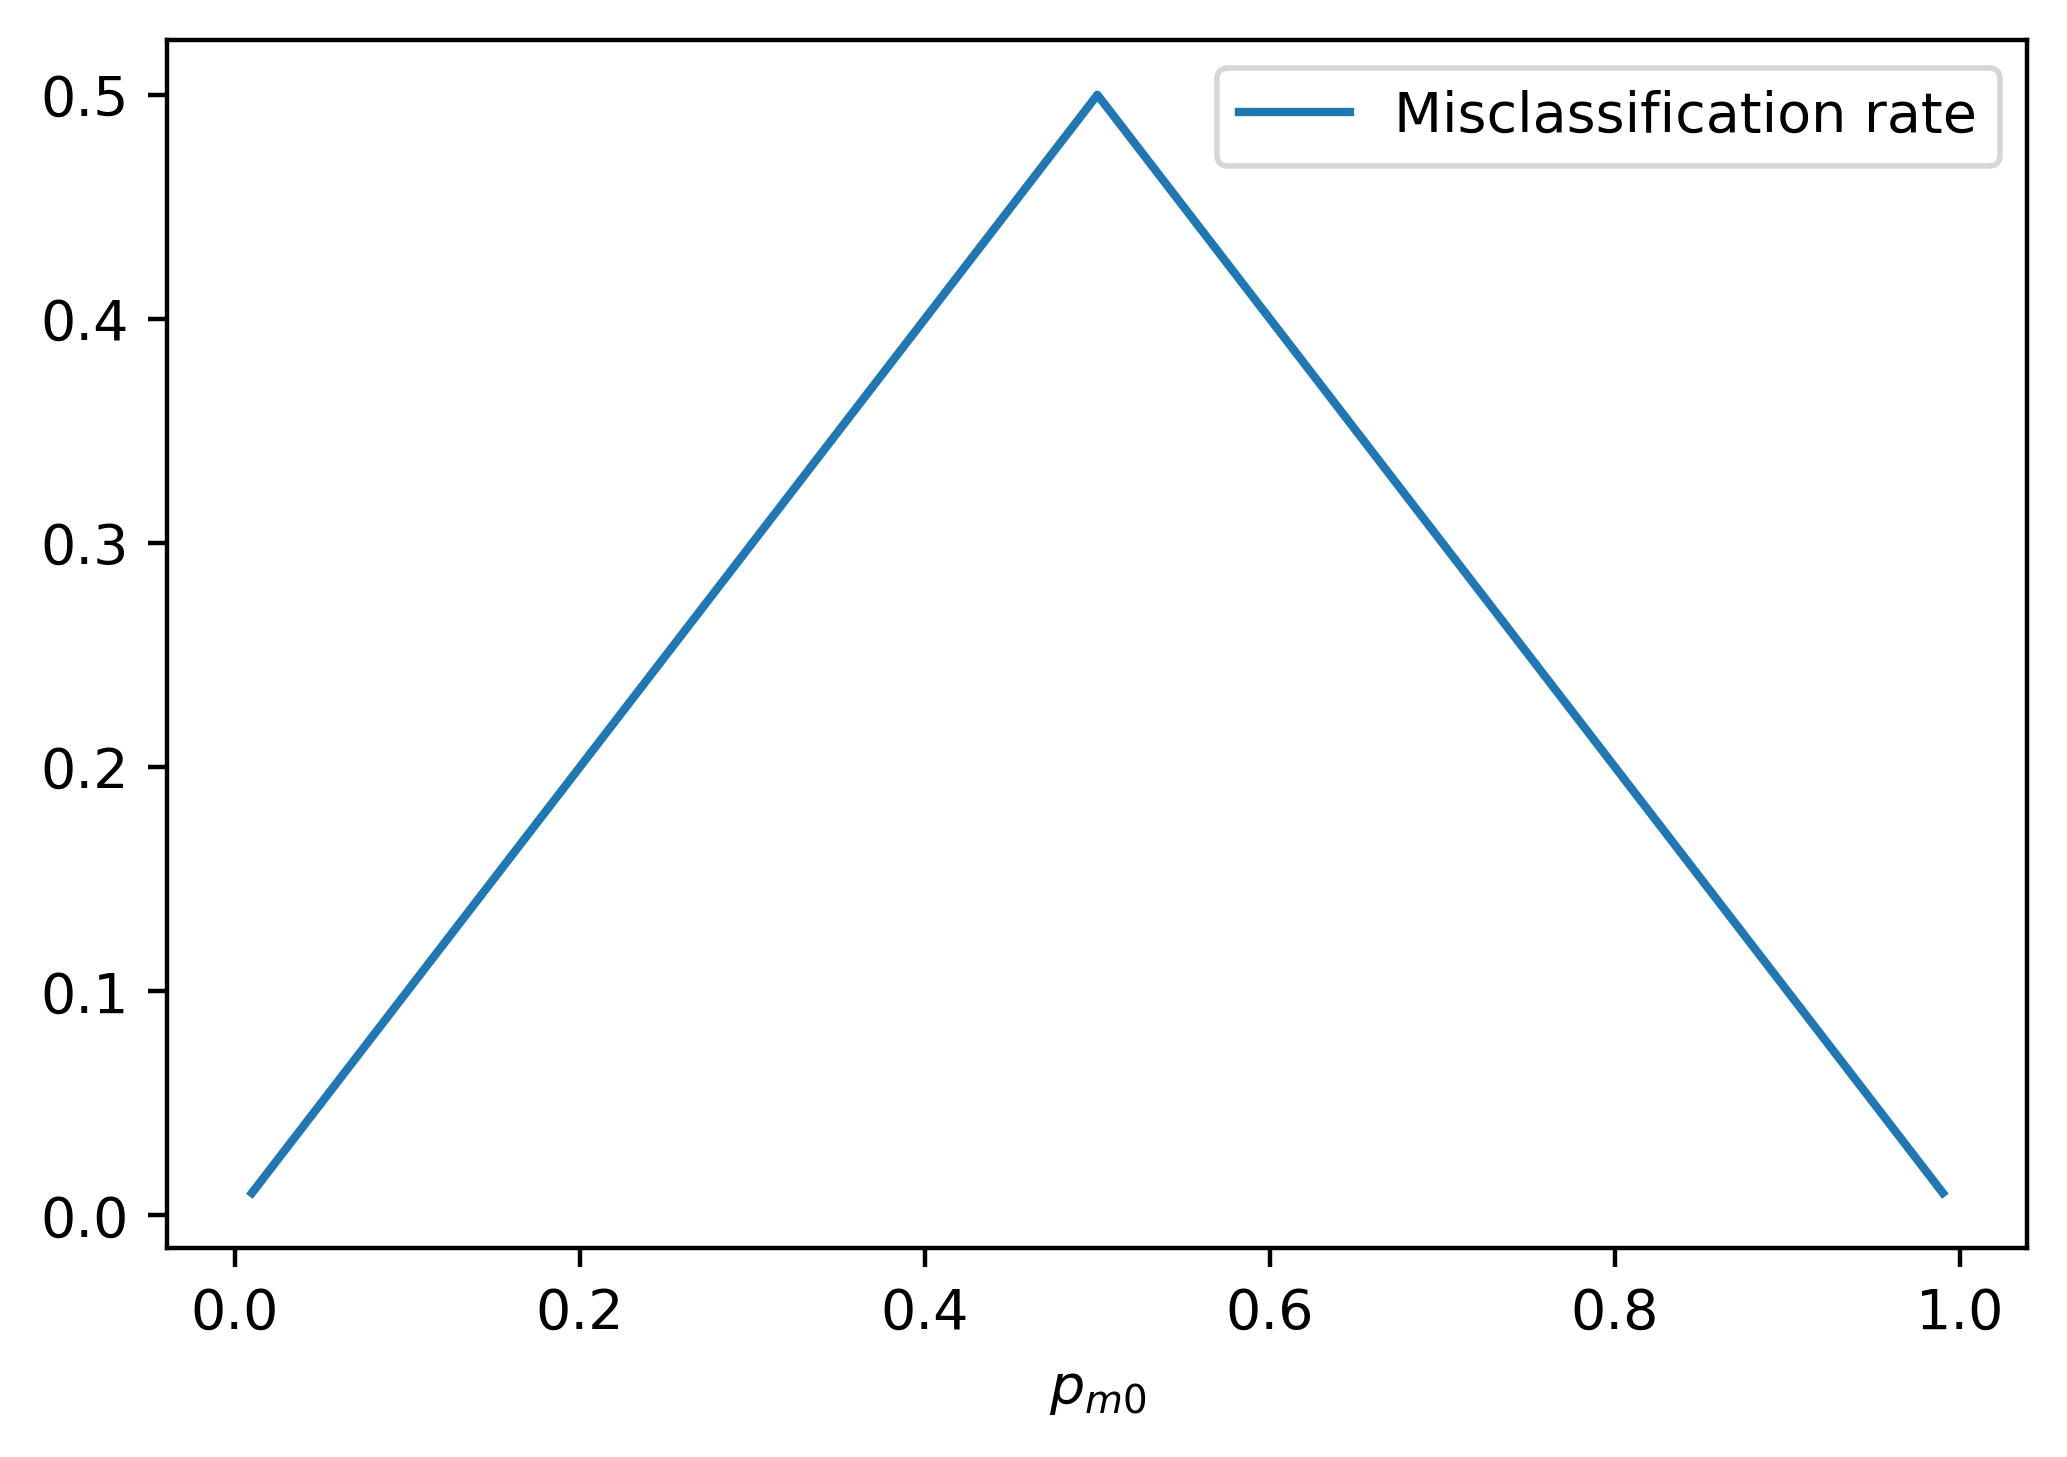

In [464]:
mpl.rcParams['figure.dpi'] = 400
plt.plot(pm0, misclassification_rate, label='Misclassification rate')
plt.xlabel('$p_{m0}$')
plt.legend()

In [465]:
gini = (pm0*(1-pm0)) + (pm1*(1-pm1))

In [466]:
cross_ent = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1)))

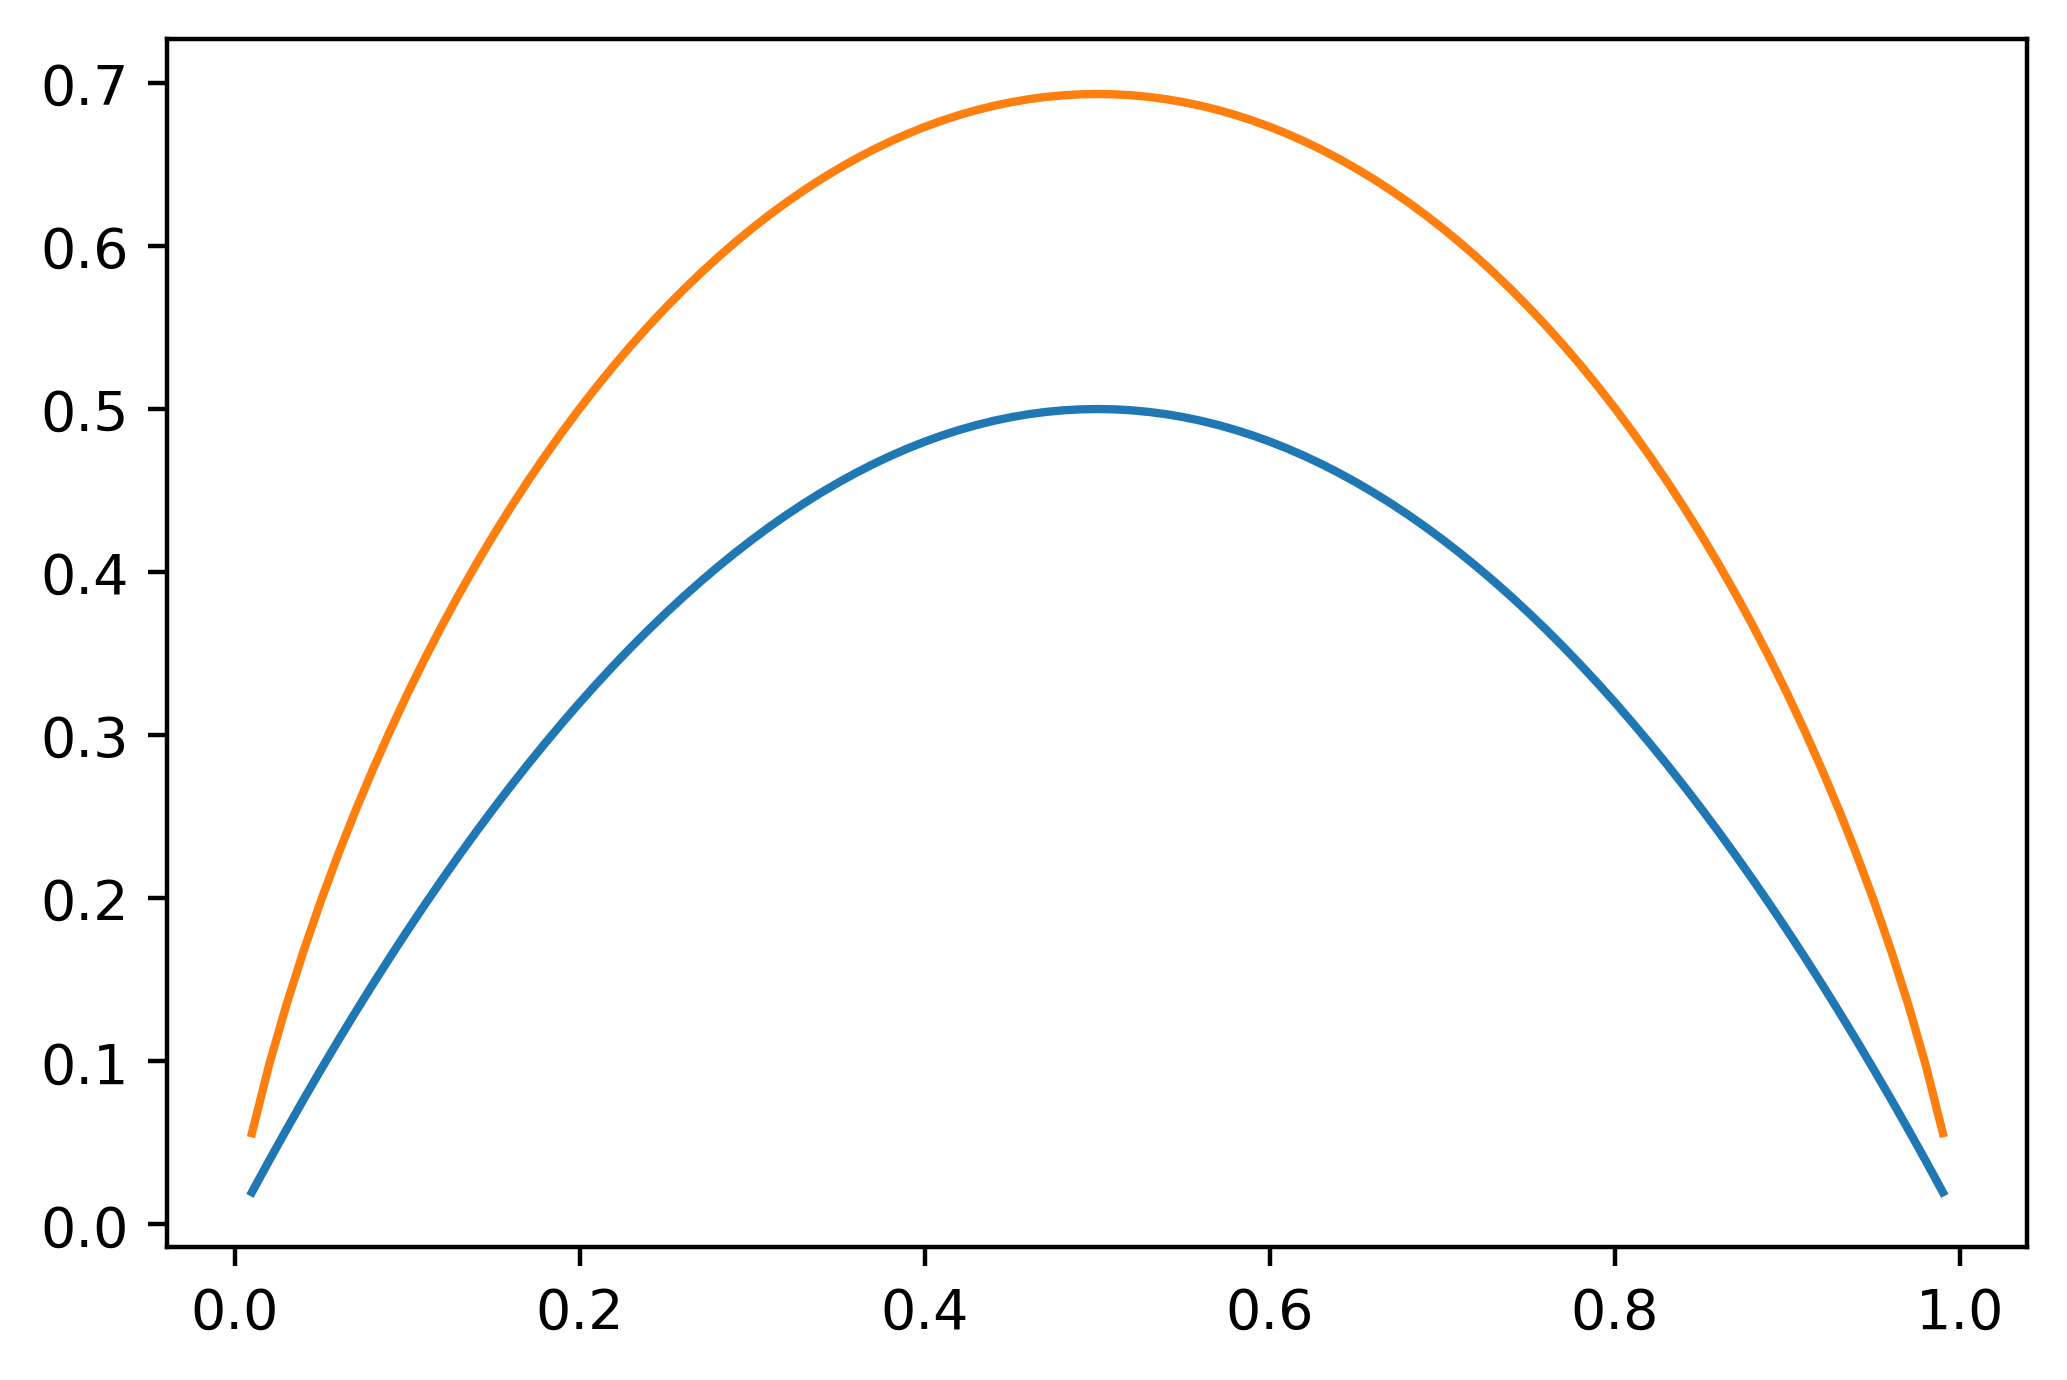

In [467]:
plt.plot(pm0, gini, label='Gini impurity')
plt.plot(pm0, cross_ent, label='Cross entropy')

In [468]:
from sklearn.model_selection import GridSearchCV
X_train.shape

(21583, 17)

In [469]:
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]}

In [470]:
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
                  n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [471]:
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    2.9s finished
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2), iid=False,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [472]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.022179,0.003890,0.001995,0.000005,1,{'max_depth': 1},0.655488,0.644317,0.650421,0.627949,0.644544,0.010366,7,0.640899,0.644621,0.642586,0.650075,0.644545,0.003454
1,0.037877,0.000717,0.002770,0.000846,2,{'max_depth': 2},0.708724,0.704521,0.699146,0.682065,0.698614,0.010140,5,0.695303,0.697079,0.698870,0.704360,0.698903,0.003393
2,0.068816,0.000008,0.002496,0.000496,4,{'max_depth': 4},0.759445,0.745320,0.735722,0.732775,0.743316,0.010404,2,0.745931,0.747802,0.751549,0.755097,0.750095,0.003526
3,0.098985,0.000434,0.002750,0.000430,6,{'max_depth': 6},0.767766,0.748381,0.738051,0.732594,0.746698,0.013420,1,0.767908,0.772099,0.775143,0.780963,0.774028,0.004757
4,0.127423,0.000439,0.002991,0.000001,8,{'max_depth': 8},0.758820,0.740254,0.728220,0.726401,0.738424,0.012923,3,0.800605,0.805498,0.805052,0.806855,0.804503,0.002346
5,0.153591,0.000001,0.002995,0.000004,10,{'max_depth': 10},0.733316,0.716437,0.713219,0.704345,0.716829,0.010499,4,0.836678,0.843917,0.841905,0.843006,0.841377,0.002804
6,0.178762,0.000421,0.002744,0.000433,12,{'max_depth': 12},0.695810,0.678307,0.677414,0.681941,0.683368,0.007381,6,0.877075,0.883258,0.882896,0.884557,0.881947,0.002879


In [473]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

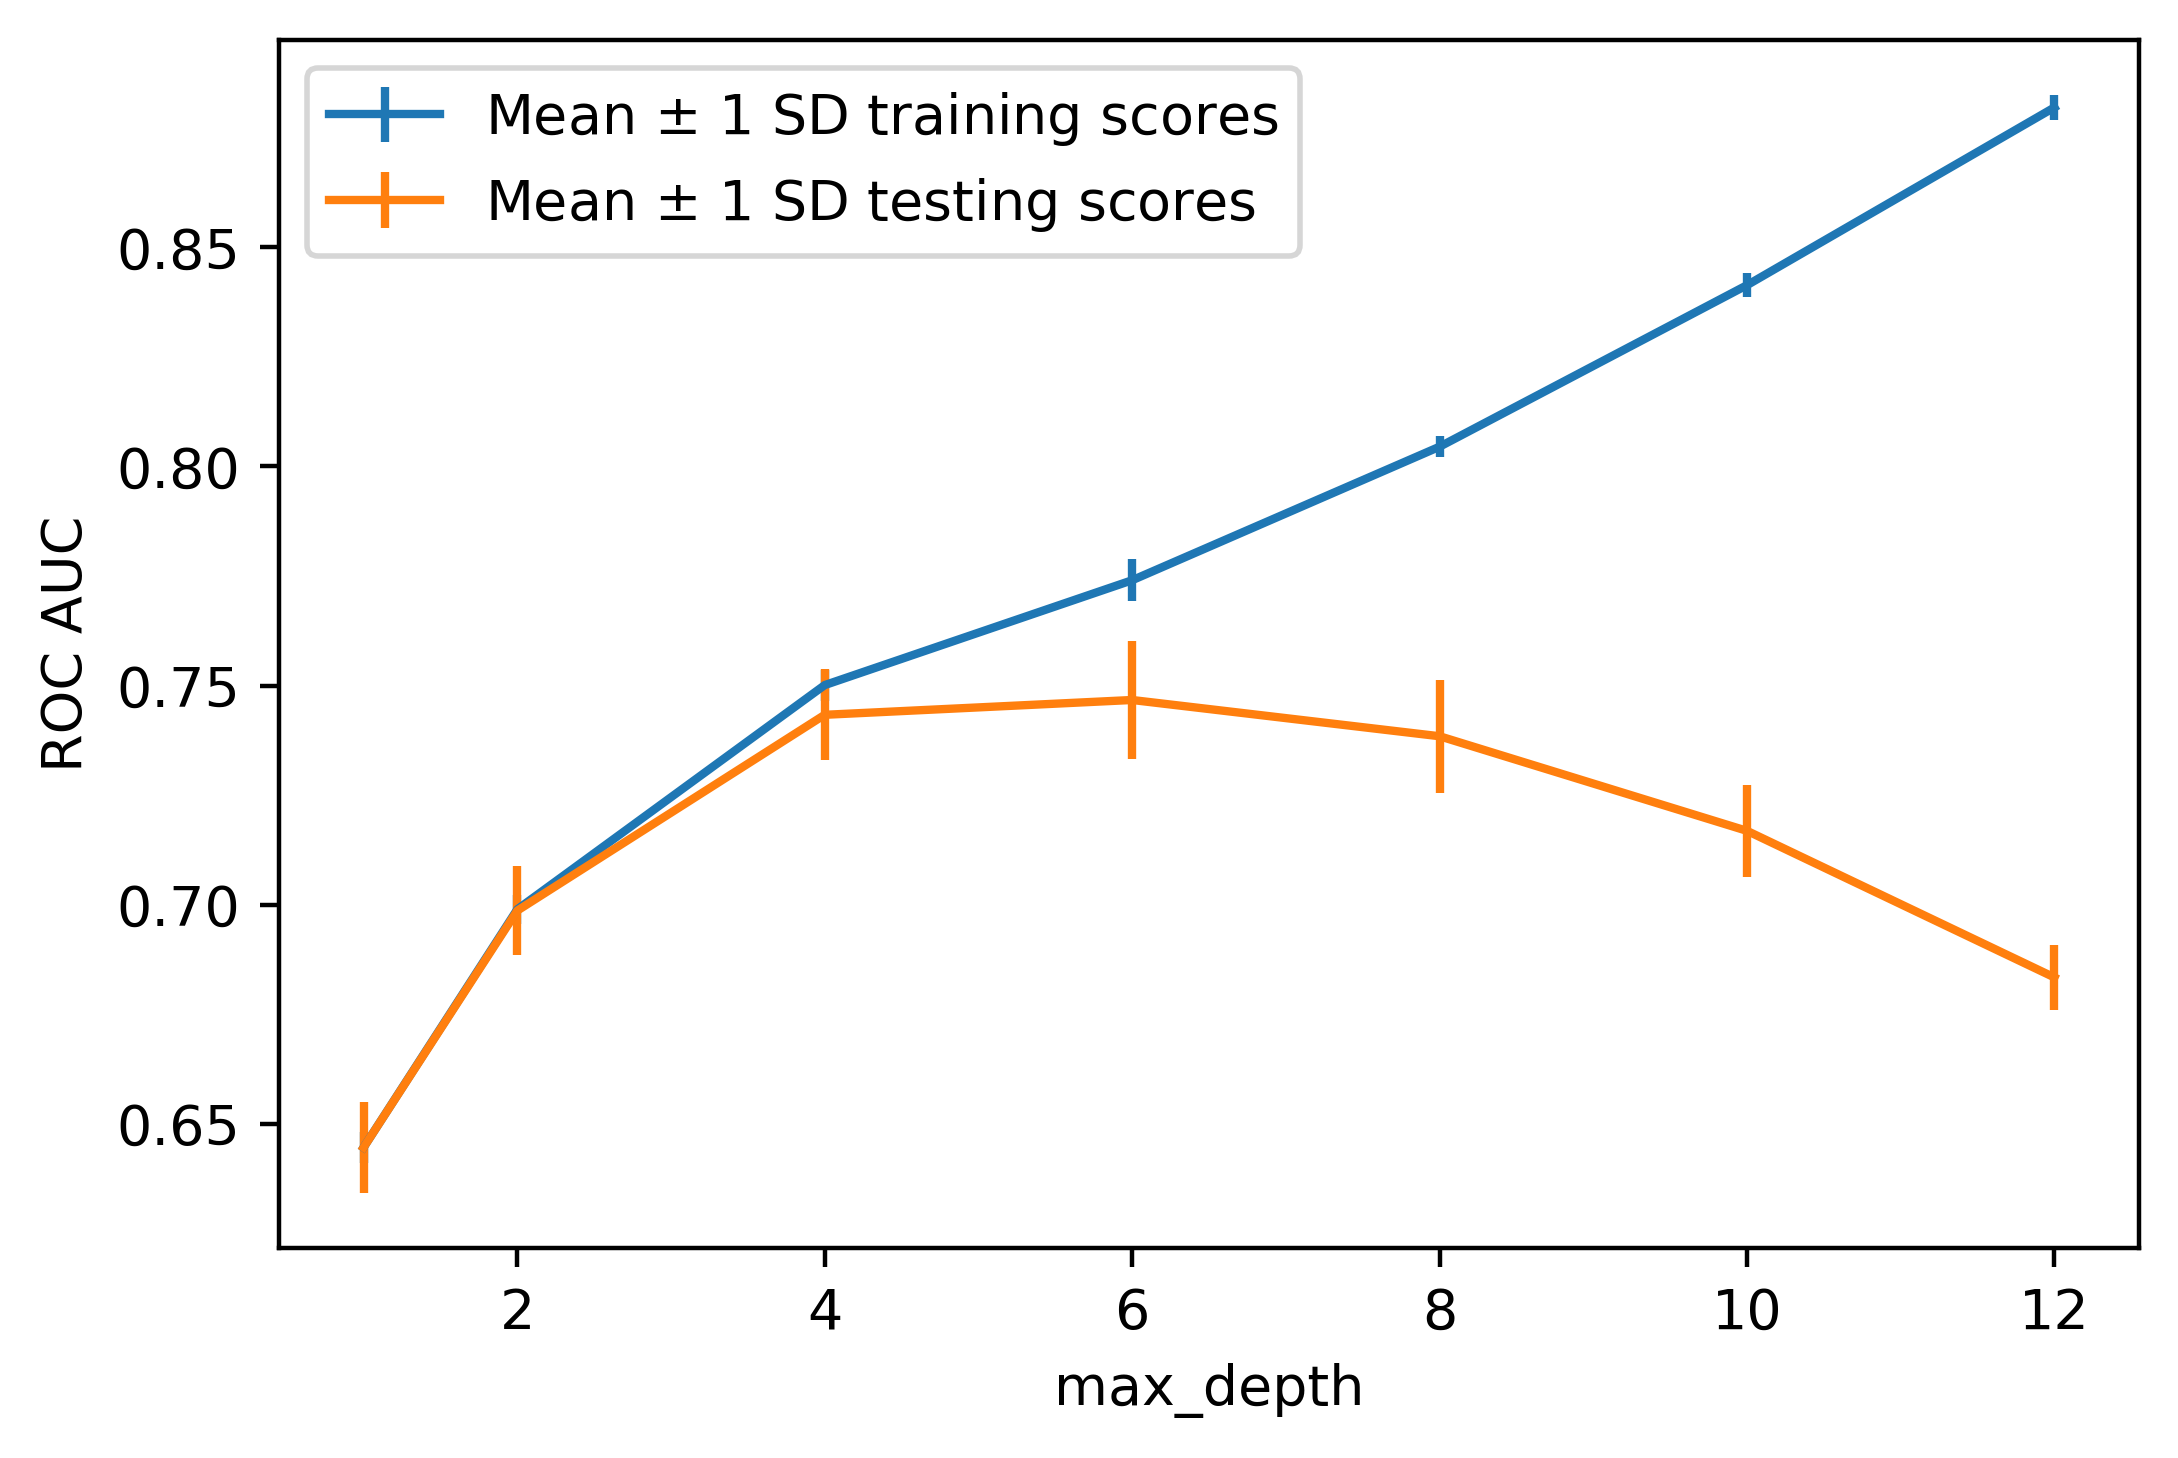

In [474]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score'],
            label='Mean $\pm$ 1 SD training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score'],
            label='Mean $\pm$ 1 SD testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')

In [475]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=10, criterion='gini', max_depth=3,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None)

In [476]:
rf_params_ex = {'n_estimators':list(range(10,110,10))}

In [477]:
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex, scoring='roc_auc',
                        n_jobs=None, iid=False, refit=True, cv=4, verbose=1,
                        pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [478]:
cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   25.8s finished
C:\Users\Hrithik M Philip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             iid=False,
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             pre_dispatch=None, return_train_score=True, scoring='roc_auc',
             verbose=1)

In [479]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

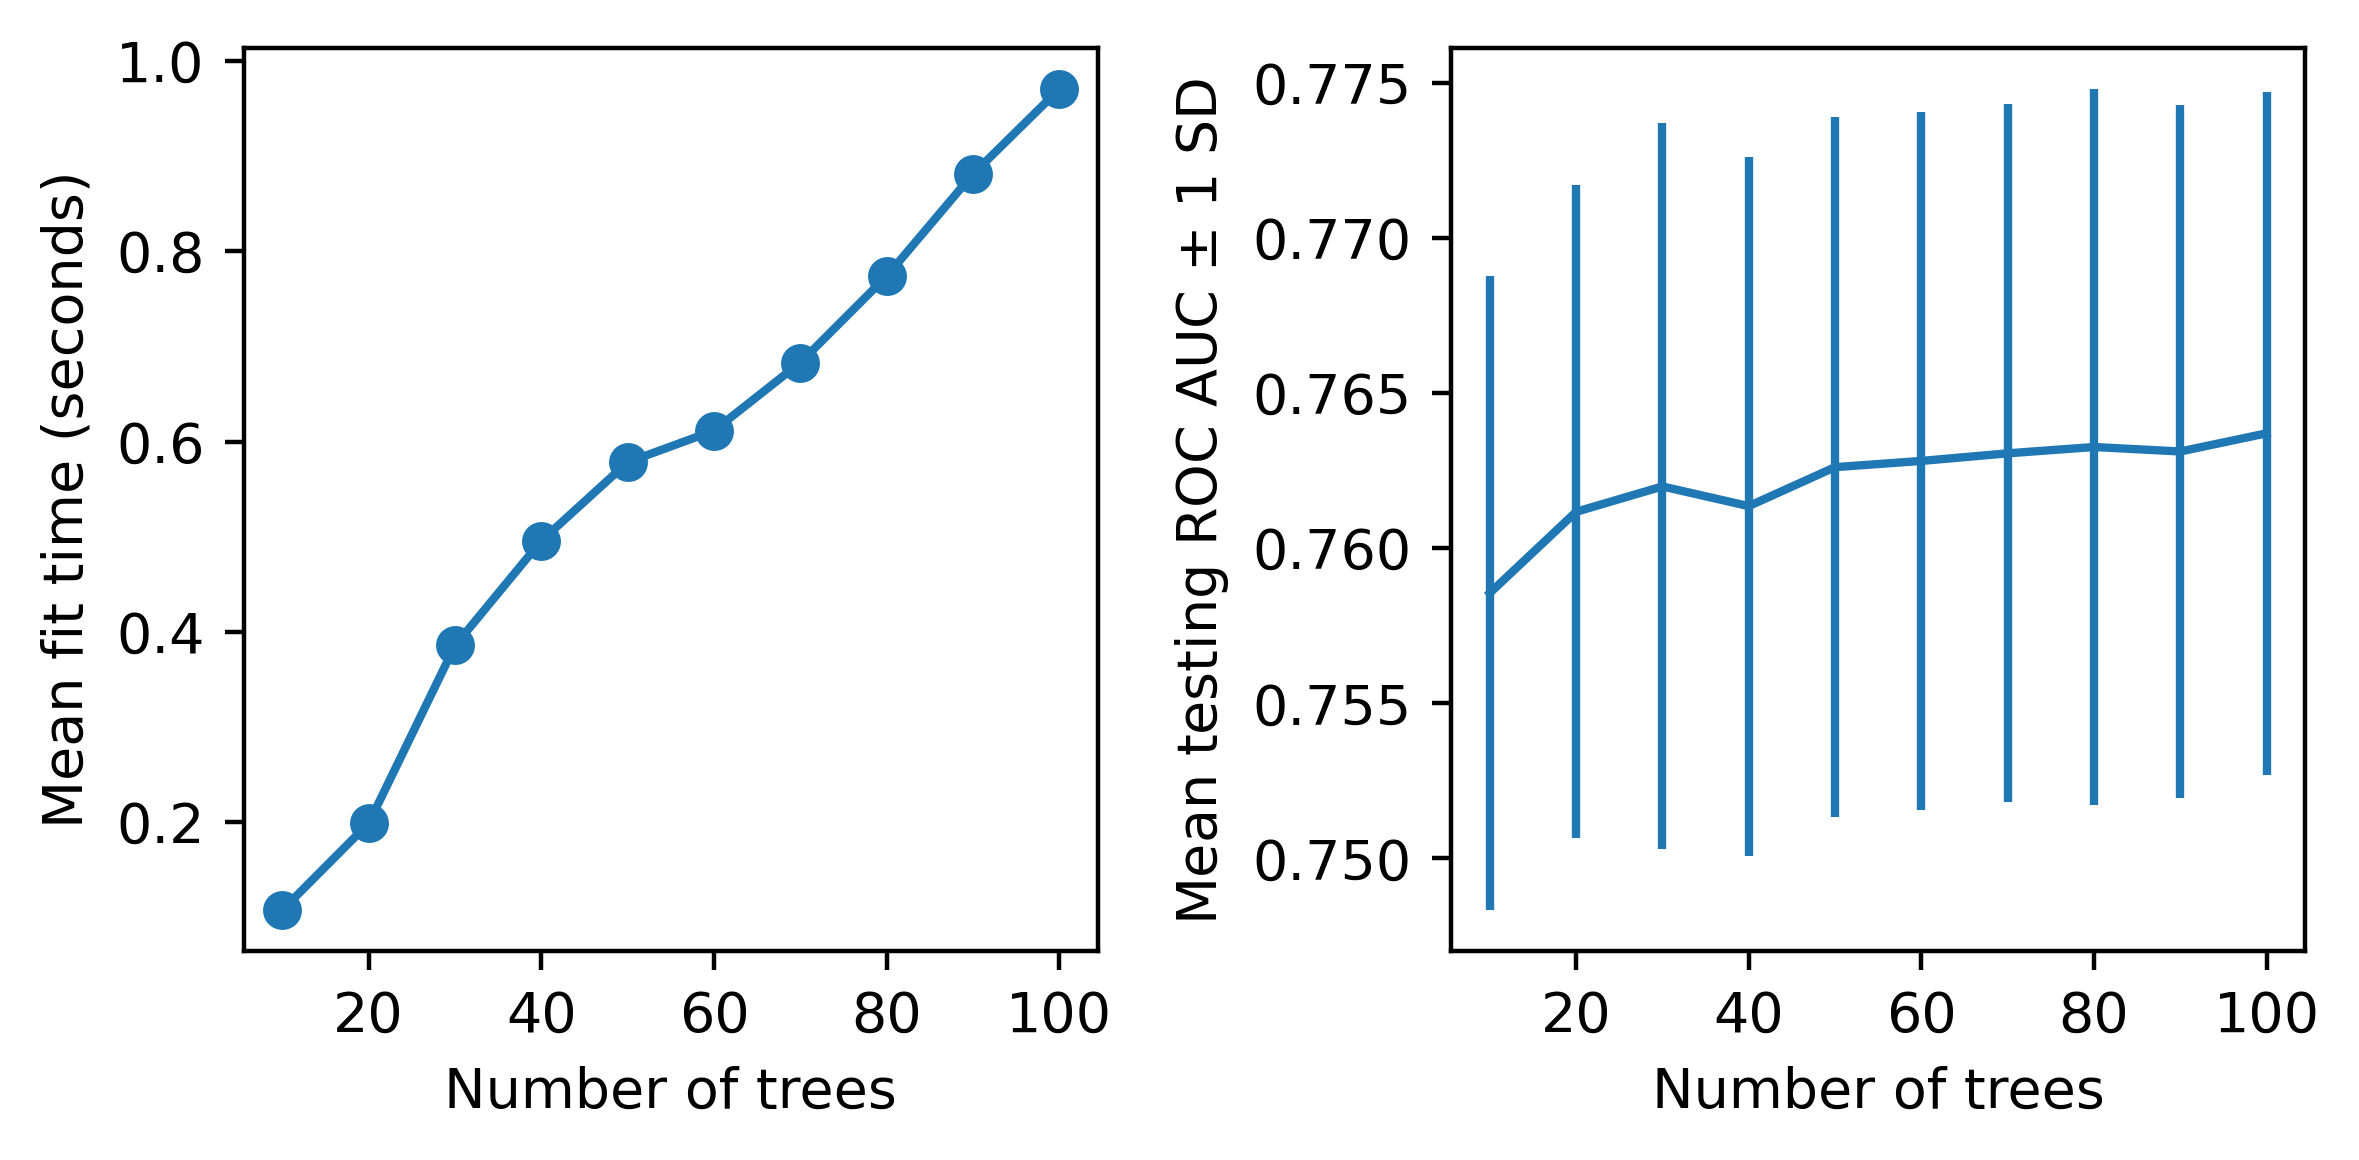

In [480]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            '-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score'])
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SD ')
plt.tight_layout()

In [481]:
cv_rf_ex.best_params_

{'n_estimators': 100}

In [482]:
feat_imp_df = pd.DataFrame({
    'Feature name':features_response[:-1],
    'Importance':cv_rf_ex.best_estimator_.feature_importances_
})
feat_imp_df.sort_values('Importance', ascending=False)

,Feature name,Importance
4,PAY_1,0.623891
11,PAY_AMT1,0.082834
0,LIMIT_BAL,0.074765
12,PAY_AMT2,0.042287
13,PAY_AMT3,0.035158
14,PAY_AMT4,0.019284
1,EDUCATION,0.018959
6,BILL_AMT2,0.014846
8,BILL_AMT4,0.014525
15,PAY_AMT5,0.014295


In [483]:
xx_example, yy_example = np.meshgrid(range(5), range(5))
print(xx_example)
print(yy_example)

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]


In [484]:
z_example = np.arange(1,17).reshape(4,4)
z_example

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Text(0, 0.5, 'Y coordinate')

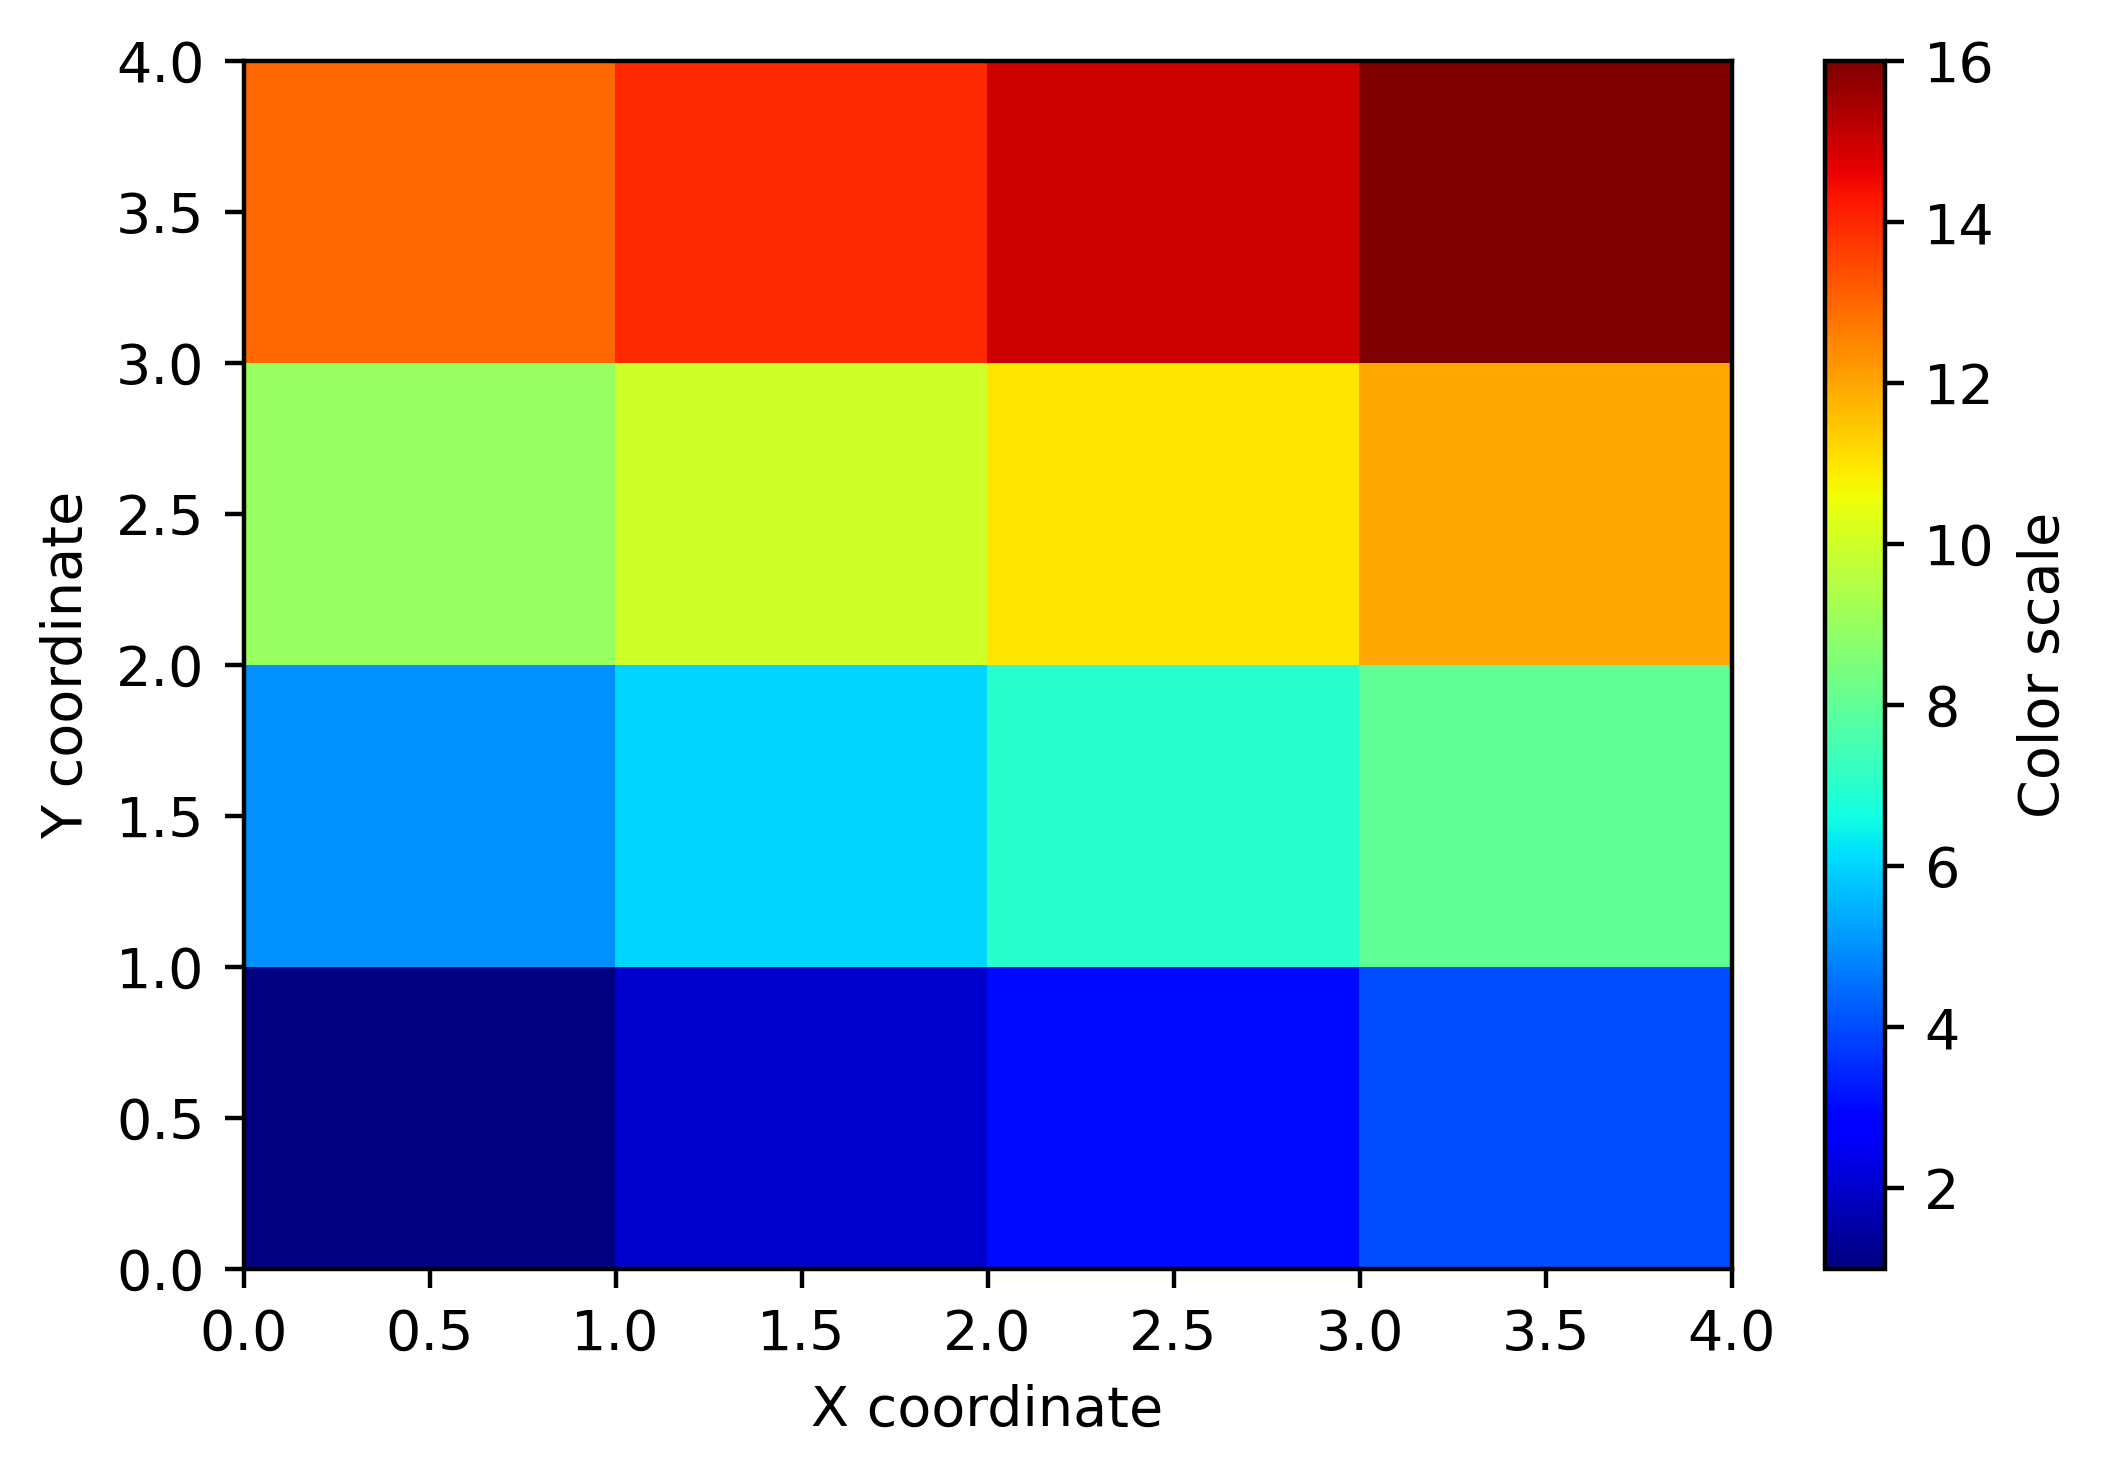

In [485]:
ax = plt.axes()
pcolor_ex = ax.pcolormesh(xx_example, yy_example, z_example, cmap=plt.cm.jet)
plt.colorbar(pcolor_ex, label='Color scale')
ax.set_xlabel('X coordinate')
ax.set_ylabel('Y coordinate')